In [6]:
import pandas as pd
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [7]:
import os
print(os.listdir(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3"))

['creditcard.csv']


In the above 2 cells I'm simply important the data using kagglehub

In [ ]:
df = pd.read_csv(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class'>

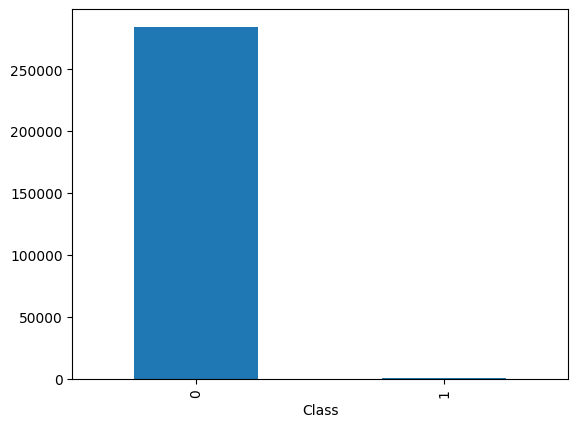

In [10]:
fraud_counts = df["Class"].value_counts()
fraud_counts.plot(kind = 'bar')


In [11]:
df.isna().any().any()

False

The below codecell splits the data up and prints out the shape which will be important as mistakes in training data are severe so having something to look back to

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Class"])  
t = df["Class"] 
X_train, X_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(t_train.shape)
print(t_test.shape)


(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [20]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, max_iter= 10000)
logisticReg.fit(X_train, t_train)

LogisticRegression(max_iter=10000, random_state=0)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
logisticReg.fit(X_train, t_train)
train_score = logisticReg.score(X_train, t_train)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9991968224011938
Test Score: 0.9991924440855307


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



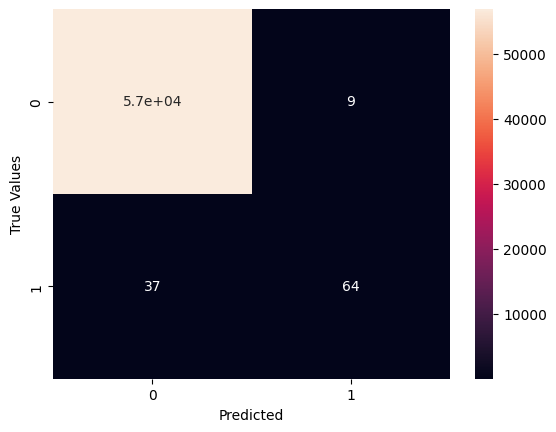

In [23]:
import matplotlib.pyplot as plt

y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [25]:
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier()
extremeGradientBoost.fit(X_train, t_train)
train_score = extremeGradientBoost.score(X_train, t_train)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.9995435553526912


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.81      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



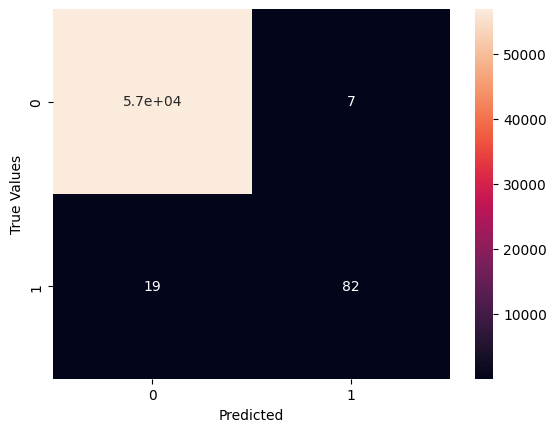

In [26]:
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [27]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, t_train)
train_score = svm.score(X_train, t_train)

test_score = svm.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9982839210867037
Test Score: 0.9982268881008391


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

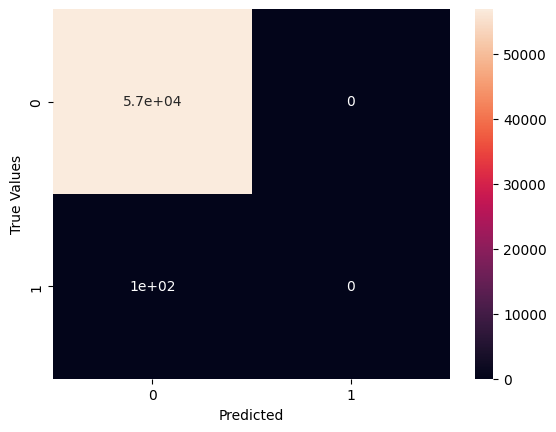

In [28]:
y_pred = svm.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, t_train)
train_score = rf.score(X_train, t_train)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.9994908886626171


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



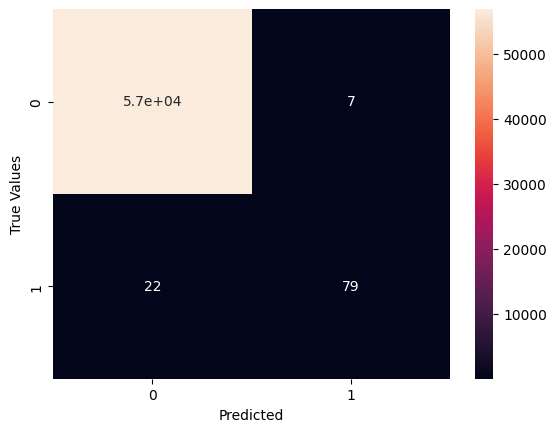

In [30]:
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, t_train)
train_score = mlp.score(X_train, t_train)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9983541442647413
Test Score: 0.9983673326077034


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.68      0.15      0.24       101

    accuracy                           1.00     56962
   macro avg       0.84      0.57      0.62     56962
weighted avg       1.00      1.00      1.00     56962



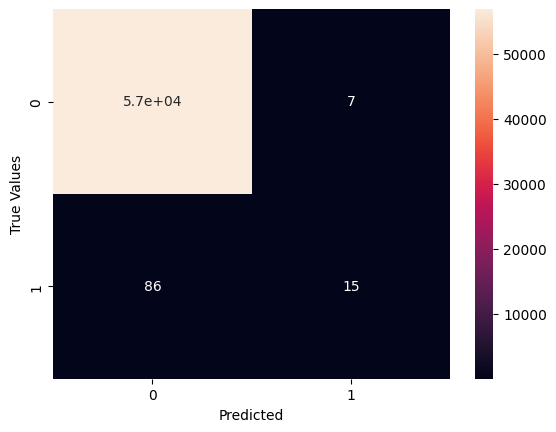

In [32]:
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()